In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os, sys
from google.colab import drive

In [ ]:
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
sys.path.append("/content/drive/My Drive/Colab Notebooks/SPICES DATSET")

In [ ]:
ls

 Cambodge.jfif   Clove/        nutmeg.jpeg    StarAnise.jpeg   VANILLA/
 Cardamom/       clove.jpg     PEPPER/        Turmeric/
 Cardamom.jpg    Ginger/       Pepper.jpg     Turmeric.jpg
 cinnamon.jpg    Ginger.jpeg  'STAR ANISE'/   Vanila.jpg


In [ ]:
train_directory='/content/drive/My Drive/Colab Notebooks/SPICES DATSET/Train'
test_directory='/content/drive/My Drive/Colab Notebooks/SPICES DATSET/Test'
val_directory='/content/drive/My Drive/Colab Notebooks/SPICES DATSET/val'

In [ ]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# # don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
  # useful for getting number of classes
folders = glob('/content/drive/My Drive/Colab Notebooks/SPICES DATSET/Train/*')
len(folders)

7

In [ ]:
# our layers 
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 829 images belonging to 7 classes.
Found 107 images belonging to 7 classes.


In [ ]:
print(len(training_set))
print(len(test_set))

26
4


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
26/26 [==============================] - 500s 19s/step - loss: 1.5357 - accuracy: 0.5187 - val_loss: 0.4218 - val_accuracy: 0.8972
Epoch 2/5
26/26 [==============================] - 446s 17s/step - loss: 0.4522 - accuracy: 0.8649 - val_loss: 0.2378 - val_accuracy: 0.9533
Epoch 3/5
26/26 [==============================] - 443s 17s/step - loss: 0.2344 - accuracy: 0.9312 - val_loss: 0.2126 - val_accuracy: 0.9720
Epoch 4/5
26/26 [==============================] - 482s 19s/step - loss: 0.1472 - accuracy: 0.9650 - val_loss: 0.1955 - val_accuracy: 0.9533
Epoch 5/5
26/26 [==============================] - 479s 19s/step - loss: 0.1095 - accuracy: 0.9819 - val_loss: 0.1326 - val_accuracy: 0.9720


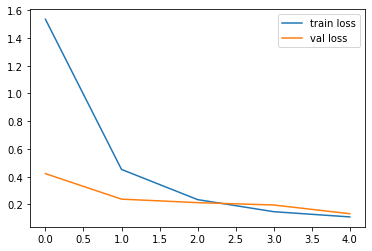

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

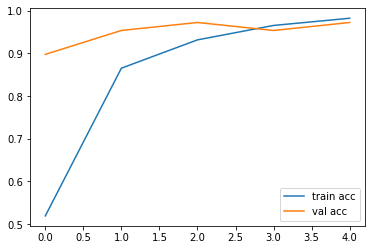

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
model.save('BC.h5')

In [ ]:
import tensorflow as tf
import keras as k
print(tf.__version__)
print(k.__version__)

2.9.2
2.9.0


In [ ]:
from keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array


model1 = load_model('BC.h5',compile=False)  

In [ ]:
lab = training_set.class_indices
lab={k:v for v,k in lab.items()}

In [ ]:
print(training_set.class_indices)

In [ ]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return res

 BC.h5           cinnamon.jpg   Ginger.jpeg  'STAR ANISE'/     Vanila.jpg
 Cambodge.jfif   Clove/         nutmeg.jpeg   StarAnise.jpeg   VANILLA/
 Cardamom/       clove.jpg      PEPPER/       Turmeric/
 Cardamom.jpg    Ginger/        Pepper.jpg    Turmeric.jpg


1/1 [==============================] - 1s 680ms/step


'PEPPER'

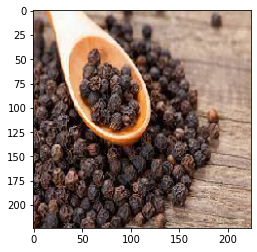

In [ ]:
img='/content/drive/My Drive/Colab Notebooks/SPICES DATSET/Test/PEPPER/p.4.jpeg'
pic=load_img('/content/drive/My Drive/Colab Notebooks/SPICES DATSET/Test/PEPPER/p.4.jpeg',target_size=(224,224,3))
plt.imshow(pic)
output(img)

In [ ]:
from google.colab import files#used to load data on google colab
uploaded =files.upload()

Saving Black-Pepper.jpg to Black-Pepper.jpg


1/1 [==============================] - 1s 880ms/step


'PEPPER'

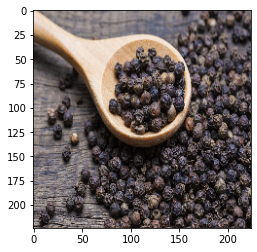

In [ ]:
img='Black-Pepper.jpg'
pic=load_img('Black-Pepper.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)
